# Homicide Rates Across Countries

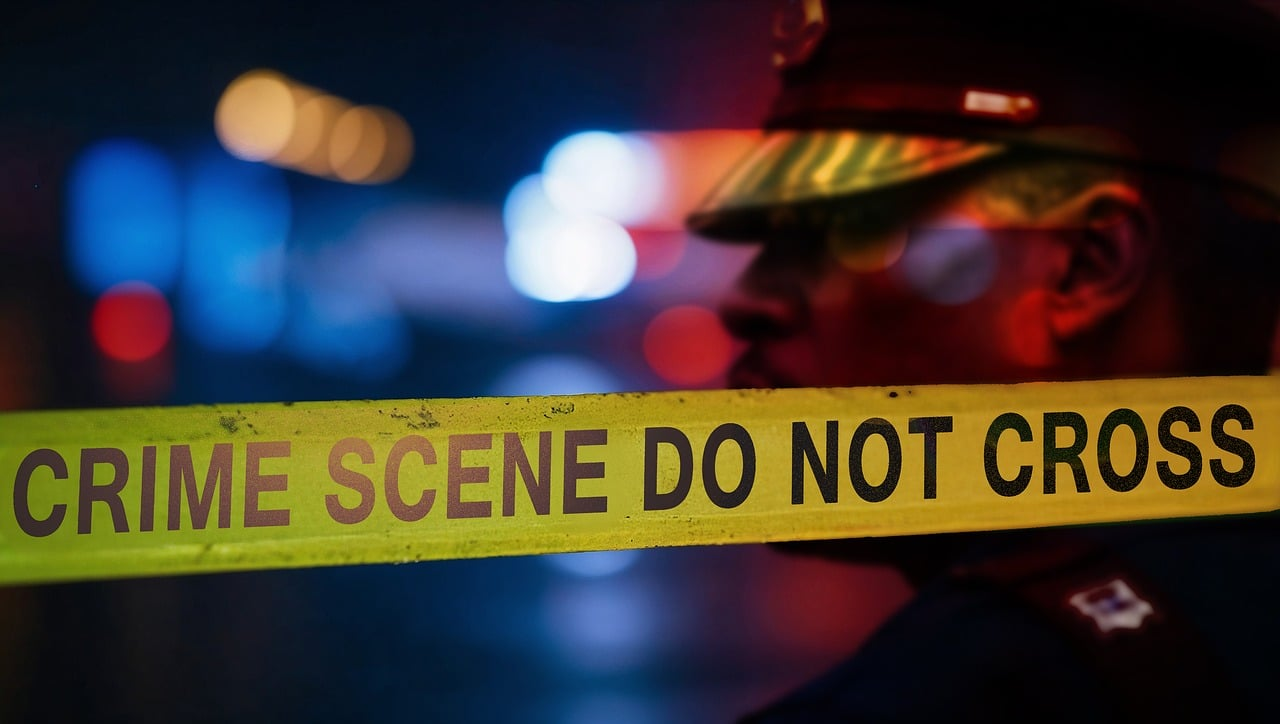



<a id="cont"></a>

# Table of Content
* <b>[1. Project Overview](#chapter1)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis](#chapter5)
* <b>[6. Conclusion](#chapter6)</b>


# 1. Project Overview <a class="anchor" id="chapter1"></a>

Our goal for this project is to analyse homicide rates across various countries, regions, and subregions. We aim to identify trends, compare continents, and visualise data to better understand which areas experience higher levels of violence and how homicide rates have changed over time.

## Dataset Overview

* **Total Entries:** 195 rows
* **Columns:** 6

## Column Descriptions

1. **Location:** The name of the country or territory.
2. **Region:** The continent or broader geographical grouping (e.g., Africa, Asia, Europe, etc.).
3. **Subregion:** A more specific geographical region within the continent (e.g., Southern Asia, Northern Africa, etc.).
4. **Rate:** The homicide rate per 100,000 people.
5. **Count:** The total number of homicides in that country for the specified year.
6. **Year:** The year for which the homicide data is recorded.

# 2. Importing Packages <a class="anchor" id="chapter2"></a>

Let's go ahead and load the usual suspects

 - In case you do not have the following packages installed, kindly install them by running the cell. 
     - Remember to remove the **'#'** if you are running the commands.

In [ ]:
#!pip install pandas
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

Now, let us import our libraries.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# 3. Loading Data <a class="anchor" id="chapter3"></a>

We are now going to load our homicide data from a CSV file into a DataFrame which will then give us a quick preview of the first few rows to get an initial look at our data.

In [6]:
df = pd.read_csv('homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


# 4. Data Cleaning <a class="anchor" id="chapter4"></a>

As we have mentioned in the beginning we can now see that our dataset consists of:
* 195 rows, &
* 6 columns

In [7]:
df.shape

(195, 6)

In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

Let us now convert the data type of the `Rate` column in our DataFrame (`df`) to integer (`int`).

In [9]:
df['Rate'] = df['Rate'].astype(int)

In [10]:
my_list = ['Rate', 'Count', 'Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)


Rate
Count
Year


In [11]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


The code below sorts the DataFrame `df` by the `Count` column in descending order (highest to lowest) and then resets the index of the DataFrame. The sorted DataFrame is stored in a new variable called `df1`, which we then display.

In [12]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,Americas,Central America,28,36579,2020
4,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


The code below modifies the `Region` column in our DataFrame by replacing all occurrences of the string 'Americas' with 'N/S America' (North & South America). The `inplace=True` argument means that the DataFrame is modified directly, without creating a new copy.

In [13]:
df['Region'].replace('Americas', 'N/S America', inplace = True)

In [14]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570



---

# 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

We have now come to the fun part, which is visualising our data.

 - We are going to begin by generating a pie chart showing the percentage distribution of **homicide counts** across different locations.

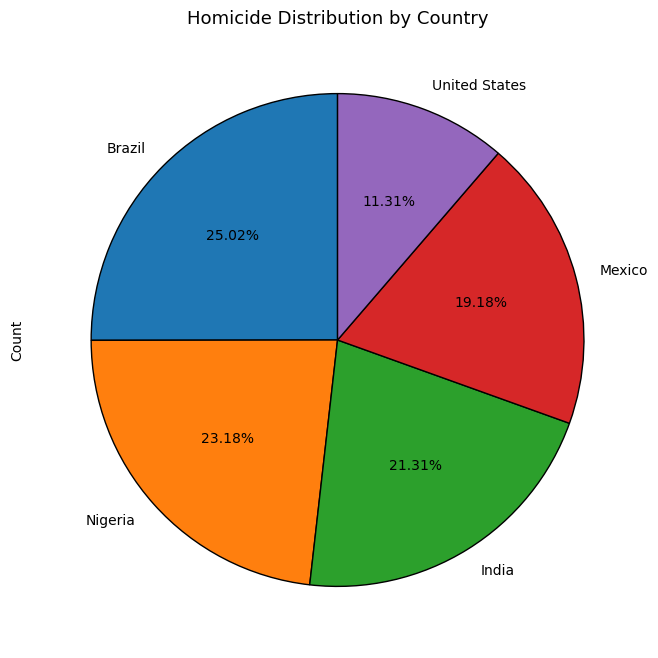

In [52]:
df1.plot(
    x = 'Location', 
    y = 'Count', 
    kind = 'pie', 
    labels = df1.Location, 
    autopct = '%1.2f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'},
    figsize=(8, 8)
)
plt.title("Homicide Distribution by Country", fontsize=13)
plt.legend().set_visible(False)
plt.show()

### Insights

- Brazil contributes the largest share of homicides, followed closely by Nigeria and India.
- The United States has the smallest share among the five countries.

---

The code below calculates the total homicides per region and ranks the regions from highest to lowest. It helps us identify which regions have the largest share of homicides globally.

In [16]:
# Count of homicide people grouped together
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

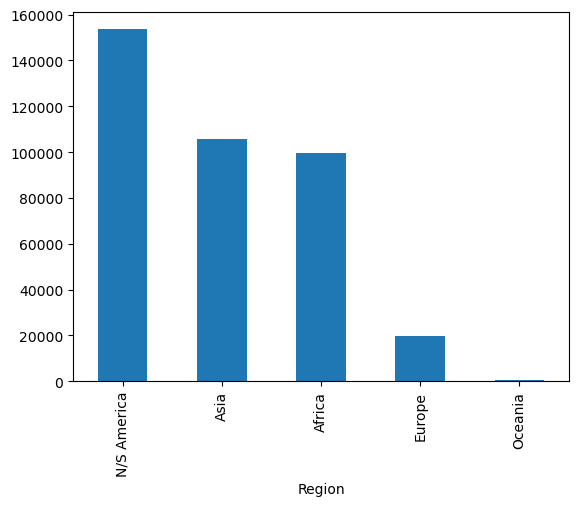

In [17]:
df2.plot(kind = 'bar')
plt.show()

### Insights

- N/S America has the highest total number of homicides.
- Asia & Africa have comparable homicide totals, with Asia slightly higher than Africa.
- Europe has a much lower total number of homicides compared to the Americas, Asia, and Africa.
- This region has the lowest total number of homicides, almost negligible compared to other regions.


---

In [18]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


- The code below identifies subregions with the highest and lowest total homicides.
- It is useful for analysing violence hotspots at a finer geographical level.

In [19]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

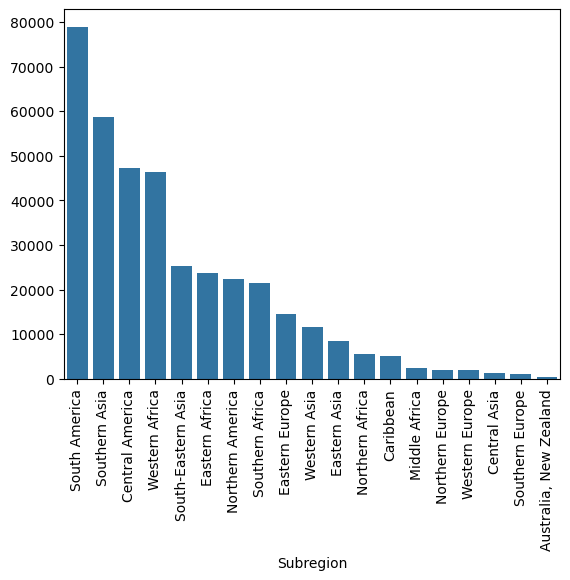

In [20]:
sns.barplot(x=df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabel = None

### Insights

- South America is a major hotspot for homicides, followed by Southern Asia and Central America.
- Subregions with lower homicide counts (e.g., Australia/New Zealand) likely have fewer incidences of violence or smaller populations.

---

In [21]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [22]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

Below, we are going to filter the DataFrame and extract rows where the region is either Asia or Europe. This way, we will be able to analyse or visualise of Asia and Europe.

In [23]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [24]:
df4 = df[df['Region'].isin(['Asia', 'Europe'])]

In [25]:
df4 = df4[df4['Year']> 2016][['Region', 'Year', 'Count']]

In [26]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


The code below calculates the total homicides by region (in this case, Asia and Europe) for each year.

In [27]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [28]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [29]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

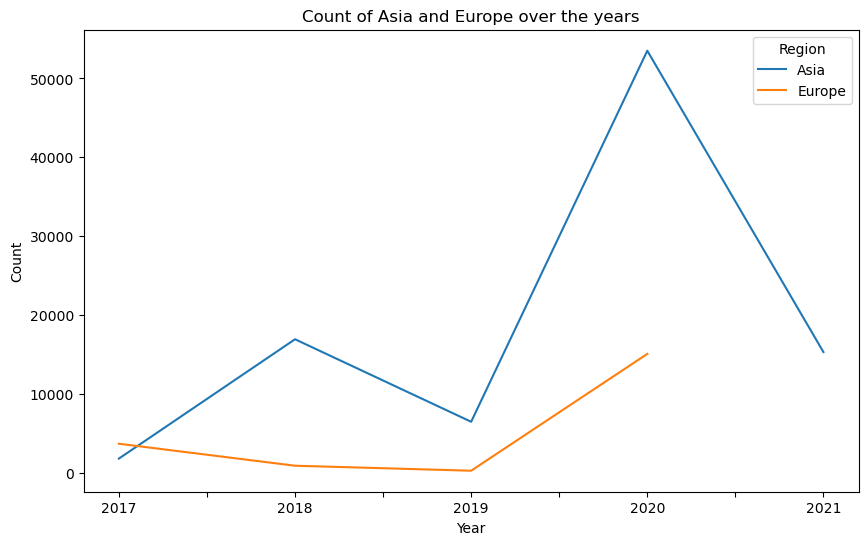

In [30]:
df_unstacked.plot(kind = 'line', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over the years')
plt.show()

### Insights

**Asia:**

- The count of homicides in Asia shows significant fluctuations over the years.
- There is a sharp increase in 2020, reaching the highest point in the dataset for this region.
- Following this peak, the count drops sharply in 2021.

**Europe:**

- The homicide count in Europe remains relatively stable compared to Asia.
- After a slight decline around 2018-2019, the count starts to increase steadily, peaking in 2020.

**General Trend:**

- Asia shows much larger variability and overall higher counts compared to Europe.
- Europe shows a gradual and steady change in homicide counts over the years.


---

In [31]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


Below we are going to identify years with the highest total homicide rates.

In [32]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int64

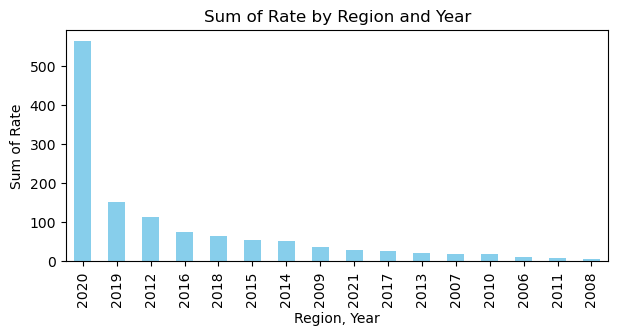

In [33]:
df5.plot(kind = 'bar', figsize = (7,3), color = 'skyblue')
plt.xlabel('Region, Year')
plt.ylabel('Sum of Rate')
plt.title('Sum of Rate by Region and Year')
plt.show()

### Insights

- This bar chart shows the total homicide rates by year, with 2020 having the highest total rate, followed by 2019 and 2012. 
- Earlier years have significantly lower rates, indicating a notable spike in more recent years. The chart highlights 2020 as an outlier or critical year for further investigation.

---

In [34]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


The code below: 

- Calculates the total homicides for each Year-Region pair.
- The sorted order ensures that the most recent years appear at the top, making trends easier to analyse.

In [35]:
df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by= 'Year', ascending = False)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2
     Asia            203

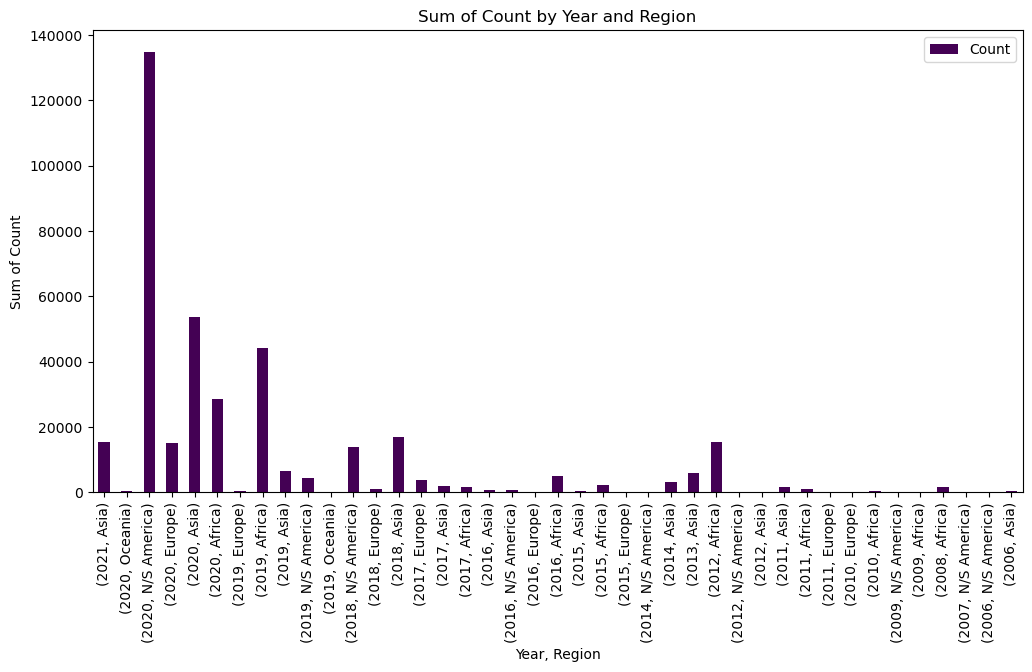

In [36]:
df6.plot(kind = 'bar', figsize = (12,6), colormap = 'viridis')
plt.xlabel('Year, Region')
plt.ylabel('Sum of Count')
plt.title('Sum of Count by Year and Region')
plt.show()

### Insights

**2020:**

- The spike in 2020 for N/S America indicates a significant rise in violence or improved reporting mechanisms.
- This year stands out as an outlier and deserves further investigation.

**Regional Differences:**

- N/S America consistently has the highest homicide counts, highlighting it as a global violence hotspot.
- Europe and Oceania remain the least affected regions in terms of total homicides.

**Recent Years:**

- Homicide data for recent years (e.g., 2019, 2020) shows significantly higher totals, suggesting either increased violence or better data collection over time.

---

The code below highlights **subregions** with higher average homicide counts, making it easier to focus on violence hotspots.

In [37]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [38]:
df7.index 

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [39]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [40]:
data = {
        'Category':df7.index,
        'Value': df7.values,
        'Info': df7.values
}
df = pd.DataFrame(data)
df 

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [55]:
fig = px.treemap(df, path = ['Category'], values = 'Value', title = 'Treemap')
fig.update_traces(
    hovertemplate = 'Category: %{label}<br>Value:%{value}',
    texttemplate='%{label}<br>%{value}',  # Correctly show percentages
    textinfo='label+text')
fig.show()

### Insights

1. **Largest Subregions by Value:**

- **Southern Asia:** This subregion has the largest value (6,514.56), making it a major contributor to the dataset.
- **South America:** The second-largest contributor with a value of 6,067.08.
- **Central America:** Also significant, with a value of 5,921.38.

2. **Medium-Sized Contributors:**

- Subregions like **Southern Africa (4,295.8), Northern America (4,463.4), and Western Africa (4,210.73)** are medium contributors.
- These subregions collectively form a large part of the total value but are not as dominant as Southern Asia or South America.

3. **Smaller Subregions by Value:**

- Subregions such as **Eastern Europe (1,460.4), Northern Africa (1,107.6), and Eastern Asia (1,223.29)** contribute smaller values.
- These are overshadowed by the larger subregions but still play a noticeable role.

4. **Negligible Subregions:**

- Subregions like **Middle Africa (619.25), Western Asia (581.9), and Western Europe (230.56)** have the smallest values in the dataset.
- These are likely regions with lower occurrences or lower importance in the context of the data.

# Conclusion <a class="anchor" id="chapter6"></a>

In this project, we analysed global homicide data, highlighting significant regional and temporal patterns. 
- South America, Central America, and Southern Africa, emerged as violence hotspots with consistently high homicide counts.
- Regions like Oceania and Europe showed relatively low homicide levels.

A notable spike in 2020, especially in the Americas, emphasized the importance of addressing sociopolitical and economic factors contributing to violence. The data also showed obvious disparities, with a few regions accounting for the majority of global homicides.

### Final Takeaway:

This analysis emphasizes the need for targeted interventions in high-risk areas and data-driven policies to address global violence. Collaborative efforts are important in order to ensure safety and equity worldwide.